<a href="https://colab.research.google.com/github/stbalaji/AIForBusiness/blob/main/01AIForBusinessCV_Inspecting_grayscale_images_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI for Business
# Deep Learning - Computer Vision
# Sample 01 - Code to illustrate Basic Image Manipulation using Open CV

## Step 01 Download a Image into the Python Environment

In [2]:
!wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg -O testImage.jpeg

--2023-10-25 07:53:41--  https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/l98leemr7r5stnm/Hemanvi.jpeg [following]
--2023-10-25 07:53:41--  https://www.dropbox.com/s/raw/l98leemr7r5stnm/Hemanvi.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7cb4d10045d6d0d4c4c89976b2.dl.dropboxusercontent.com/cd/0/inline/CGT_nbRGtFqciG41yq1ZPoSl1VLNcb_-vYQxhm2gH1eEH9H6RGmA9z6QGF79eFwE1i2fdXmqz5p04hVJ6o-w2GdTA_nZfSnY0nHgbF_Z8mNeHuwa4mdPUbsAwbUvRgZmcnCw6UINgU-MzvUADghmm0iY/file# [following]
--2023-10-25 07:53:41--  https://uc7cb4d10045d6d0d4c4c89976b2.dl.dropboxusercontent.com/cd/0/inline/CGT_nbRGtFqciG41yq1ZPoSl1VLNcb_-vYQxhm2gH1eEH9H6RGmA9z6QGF79eFwE1i2fdXmqz5p04hVJ6o-w2GdTA_nZfSnY0nHgbF

### Read an Image in Python

In [3]:
%matplotlib inline
import cv2, matplotlib.pyplot as plt   #Libraries - CV2 for reading images from Disk and MatplotLib for Plotting loaded images

img = cv2.imread('testImage.jpeg')   #This converts image object into an Array of Pixel Values

### Display the Image

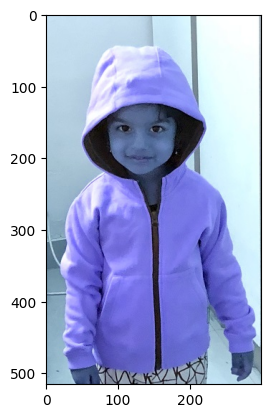

In [4]:
plt.imshow(img)    #Display the original Image

## Image Manipulation A - Cropping the Image


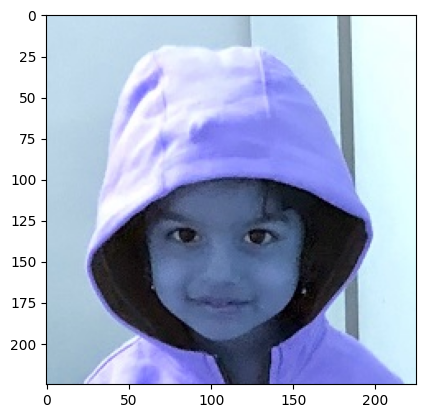

In [5]:
img_cropped = img[25:250,25:250]                     # Cropping the Image. Think in terms of image[y:y+h, x:x+w]
plt.imshow(img_cropped)                              # Observe the the image is represented as a 225 by 225 Array

In [6]:
print("Original Image Size :  ", img.shape)  #Print the Size of the image
print("Cropped Image Size :  ", img_cropped.shape)  #Print the Size of the image

Original Image Size :   (516, 300, 3)
Cropped Image Size :   (225, 225, 3)


## Image Manipulation - B - Change to Gray Scale Image (No RGB color)

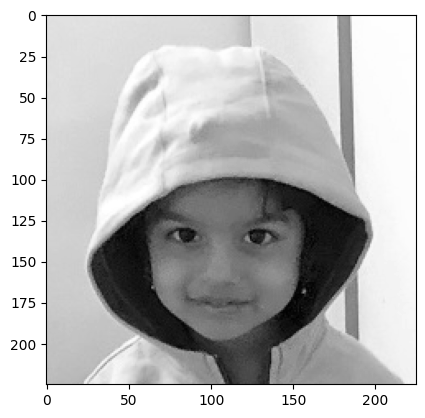

In [7]:
img_gray = cv2.cvtColor(img_cropped, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

## Image Manipulation 3 - Resize to a Smaller Size


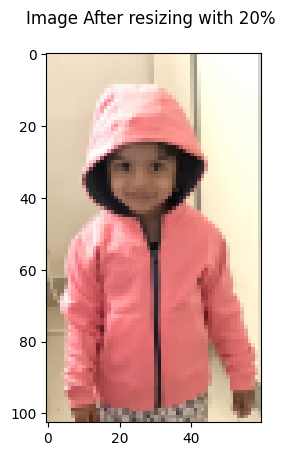

In [12]:
scale_percent = 20                                  # Percent of original size to be Resized to.
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb, dim, interpolation = cv2.INTER_AREA)
plt.title("Image After resizing with 20% \n")
plt.imshow(img_resized, cmap='gray')

## Image Manipulation 4 - Rotate Image by certain Degree around its center

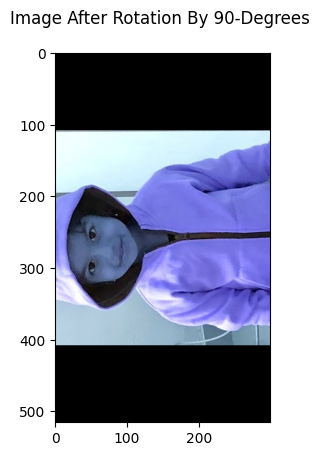

In [23]:
(h, w, d) = img.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 90, 1.0)
img_rotated = cv2.warpAffine(img, M, (w, h))
plt.title("Image After Rotation By 90-Degrees \n")
plt.imshow(img_rotated, cmap='gray')

# Blurring an Image

# Similarly there is a Thresholding function:
Threshold function will turn all shades darker (smaller) than 127 to 0 and all brighter (greater) to 255

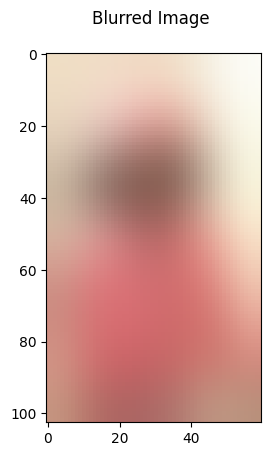

In [32]:
img_blurred = cv2.GaussianBlur(img_resized, (51, 51), 0)
plt.title("Blurred Image \n")
plt.imshow(img_blurred, cmap='gray')

# Draw Bounding Box on the Face :
### Rectangle takes following parameters
The first parameter is the image.
The second parameter is x1, y1 — Top Left Corner.
The third parameter is x2, y2 — Bottom Right Corner.
The fourth parameter is the rectangle color (GBR/RGB, depending on how you imported your image).
The fifth parameter is the rectangle line thickness.

In [35]:
(h, w, d) = img.shape
print(img.shape)

(516, 300, 3)


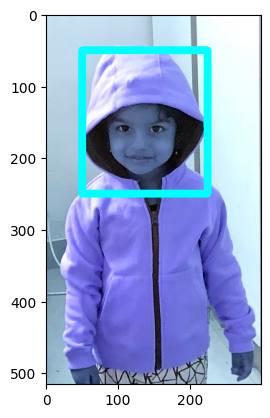

In [38]:
import cv2
img_output = img.copy()
cv2.rectangle(img_output, (50, 250), (225, 50), (0, 255, 255), 10)  # Once you detect coordinates of Face, a Bounding Box helps with coordinates of face in picture
plt.imshow(img_output, cmap='gray')

# Face Detection
### The detectMultiScale function is a general function that detects objects
### Since we’re calling it on the face cascade, that’s what it detects.

face_cascade False
1 faces detected!


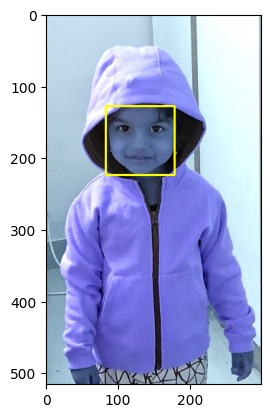

In [51]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
print("face_cascade", face_cascade.empty())
image = cv2.imread('testImage.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,scaleFactor= 1.1,minNeighbors= 5,minSize=(10, 10))

faces_detected = format(len(faces)) + " faces detected!"
print(faces_detected)
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 0), 2)
plt.imshow(image, cmap='gray')

# Detecting Eyes
### The detectMultiScale function can be used to detect eyes

2 Eyes detected


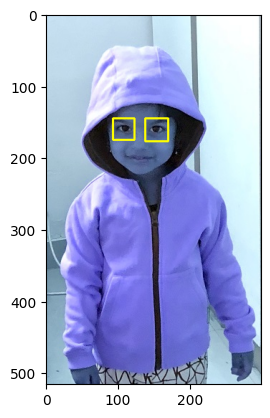

In [52]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
image = cv2.imread('testImage.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,scaleFactor= 1.1,minNeighbors= 5,minSize=(10, 10))

eyes_detected = format(len(eyes)) + " Eyes detected"
print(eyes_detected)
# Draw a rectangle around the faces
for (x, y, w, h) in eyes:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 0), 2)
plt.imshow(image, cmap='gray')

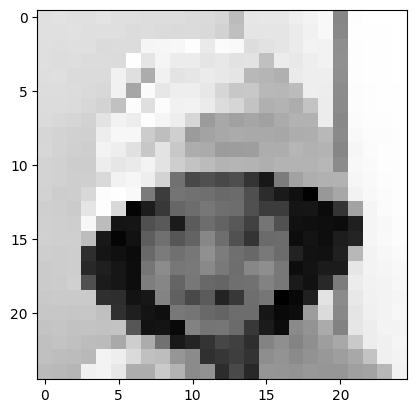

In [13]:
img_gray_small = cv2.resize(img_gray,(25,25))     # Try to represent the image using a smaller number of Pixels
plt.imshow(img_gray_small, cmap='gray')           # See that the image appears Blurred

In [ ]:
print(img_gray_small)  # Look at the Array Values

[[223 225 223 223 226 222 222 220 220 220 218 217 213 187 229 230 230 237
  242 247 135 252 254 254 254]
 [223 223 224 222 222 222 219 220 218 217 218 216 210 191 228 228 228 234
  240 247 137 253 253 253 254]
 [222 221 222 222 218 219 219 244 245 246 252 233 250 248 220 225 228 234
  242 241 144 252 253 253 254]
 [222 220 221 219 219 218 253 228 244 235 235 228 231 225 227 192 235 231
  237 241 145 252 253 253 254]
 [221 222 218 218 218 240 222 172 240 226 229 234 231 228 184 181 176 233
  237 237 144 252 253 253 254]
 [220 220 219 217 215 240 167 249 230 237 237 230 213 199 200 184 183 188
  237 236 141 251 252 253 253]
 [219 219 218 214 212 193 251 222 251 240 241 234 219 213 195 176 179 173
  195 235 140 251 252 253 253]
 [218 215 213 210 226 241 236 252 244 237 213 156 169 162 167 162 171 178
  178 235 137 250 252 252 253]
 [213 212 209 208 236 246 246 204 190 207 156 164 169 171 170 170 168 173
  174 184 139 248 251 251 252]
 [214 212 208 206 242 237 224 199 227 200 173 171 157 1

Following a View of the same Array when displayed using Excel and color graded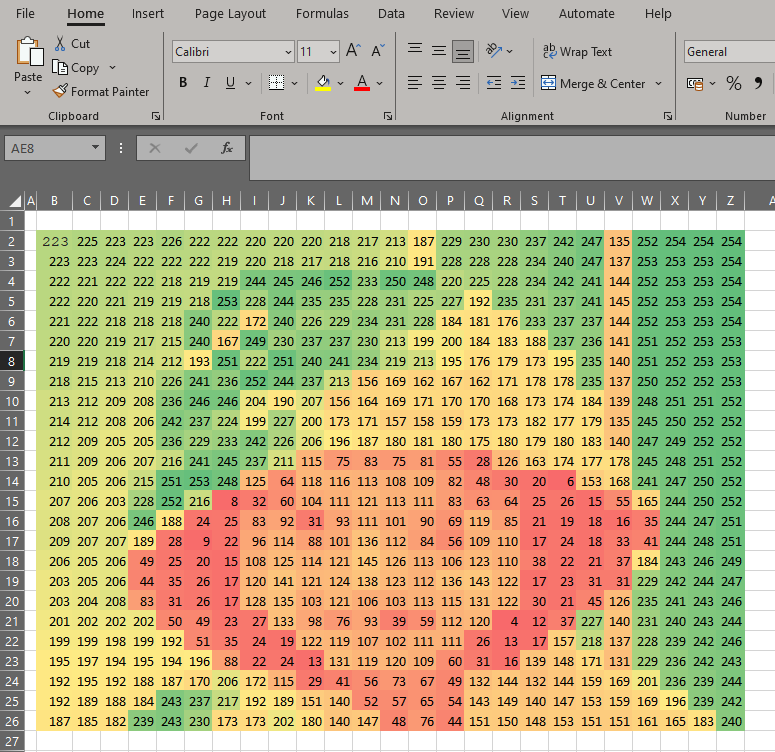

# Other Features
- Edges and Corners for Image Segmentation
- Color Seperation Feature for example Traffic Light Detection
- Image Gradient Features - like how colors are changing in like Texture Detection
- So On...

There are lot of such Features.

Conclusion:
- We can represent an Image as an Array of Values
- This allows us to process the image "Mathematical" - which is essential form an image processing perspective

# DRAW BACK THIS APPROACH
- Need to be an expert in Image and Signal analysis or processing
- Need deep understanding features to Solution mapping i.e. what features help with problem.
- Third, there is no guarantee that the solution will work when a new image is presented

# Therefore there is a shift to Neural Networks / Deep Learning based approach